In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
import seaborn as sns

def molinsi(n,m,state,pr):
    new=state.copy()
    for i in range (n):
            for j in range(m):
                if state[i][j]==0:
                    t=0
                    if i>0 and state[i-1][j]>0:
                        random.random()
                        if  random.random() < pr:
                            t += 1
                    if i<n-1 and state[i+1][j]>0:
                        x=random.random()
                        if  random.random() < pr:
                            t += 1
                    if j>0 and state[i][j-1]>0:
                        if  random.random() < pr:
                            t += 1
                    if j<m-1 and state[i][j+1]>0:
                        if  random.random() < pr:
                            t += 1
                    if t>0:
                        new[i][j]=1
    return new

def metakinisi(n,m,state,e):
    
    new = state.copy()
    if e == 0:
        return new
    else:
        for i in range (n):
            for j in range (m):
                if random.random() < e:
                    r = random.randint(0,n-1)
                    c = random.randint(0,m-1)
                    if state[r][c] == 0:
                        new[r][c] = 1
            return new

def epidimia(n,m,b,pr,e):
    state =np.zeros((n,m),dtype=int)
    x=random.randint(0,n-1)
    y=random.randint(0,m-1)
    state[x][y]=1
    days=0
    K=[m*n-1]
    I=[1]
    A=[0]
    r=[0]
    x=True
    while x==True:
        days +=1
        sum1=0
        sum2=0
        for i in range (n):
            for j in range(m):
                if state[i][j]>0:
                    state[i][j]+=1
                if state[i][j]> b:
                    state[i][j]=-1
        state=molinsi(n,m,state,pr)
        state=metakinisi(n,m,state,e)
        for i in range (n):
            for j in range(m):
                if state[i][j]>0:
                    sum1 +=1
                if state[i][j]== -1:
                    sum2 +=1
        I.append(sum1)
        A.append(sum2)
        K.append(m*n-sum1-sum2)
        r.append(days)
        if I[days]==0:
            x=False
        fig = plt.figure()
        ax1 = fig.add_subplot(121)
        ax1.imshow(state, interpolation='bilinear', cmap=cm.Blues)
        ax2 = fig.add_subplot(122)
        ax2.imshow(state, interpolation='nearest', cmap=cm.Greens)
        plt.title(str(days) + 'η ημέρα')
        plt.show()

    print(I)
    print(A)
    print(K)
    print(days)
    plt.plot(r,I,color='r') 
    plt.plot(r,A)
    plt.plot(r,K)
    plt.legend(['KΡΟΥΣΜΑΤΑ','ΕΧΟΥΝ ΑΝΑΡΡΩΣΕΙ','ΔΕΝ ΕΧΟΥΝ ΜΟΛΥΝΘΕΙ'])
    plt.xlabel('ΗΜΕΡΕΣ')
    plt.ylabel('ΠΛΗΘΥΣΜΟΣ')
    plt.show()
        
                    
                    
                    
    
    

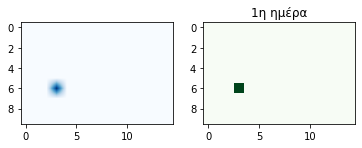

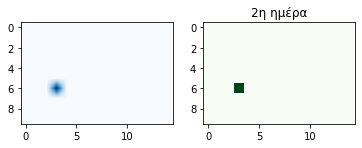

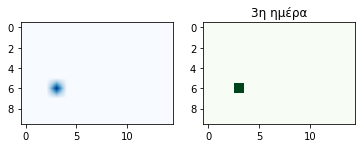

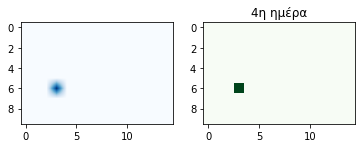

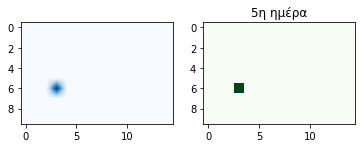

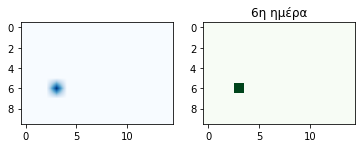

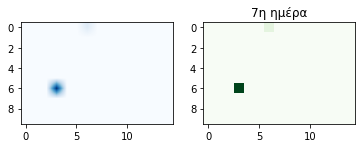

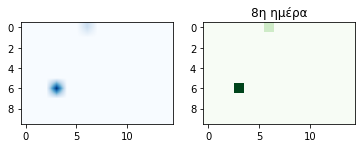

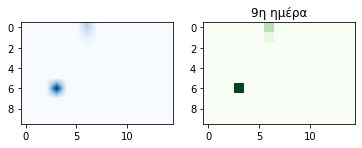

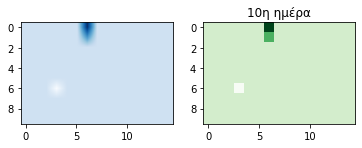

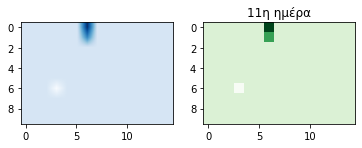

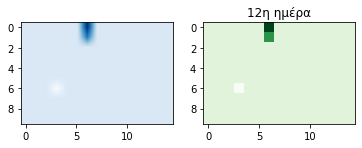

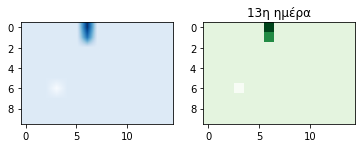

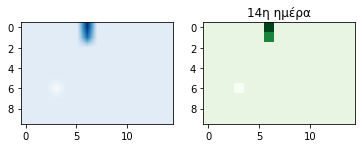

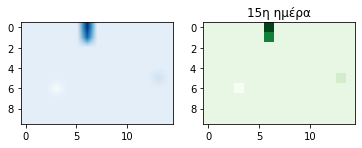

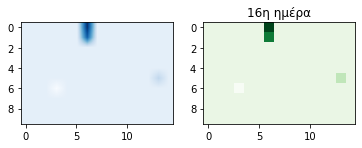

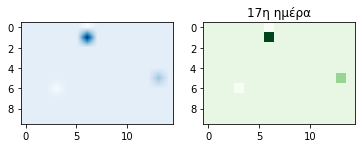

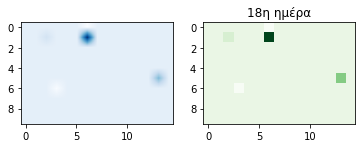

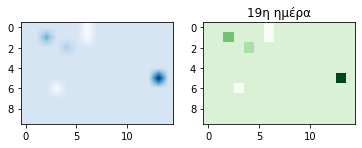

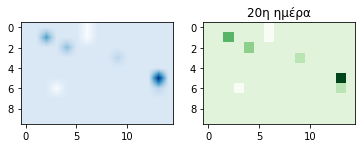

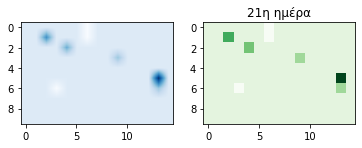

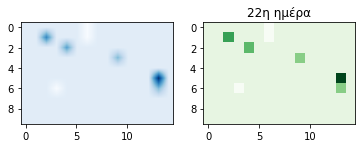

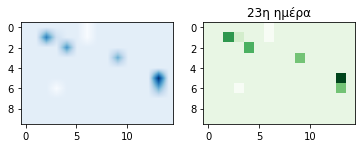

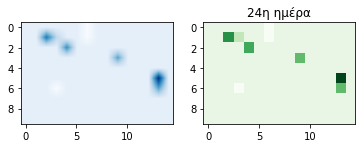

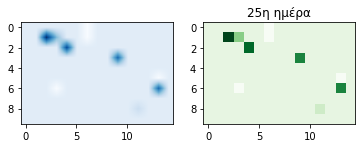

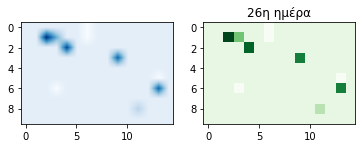

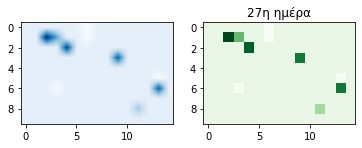

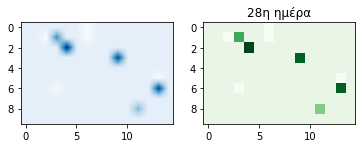

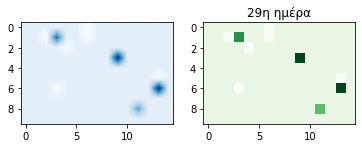

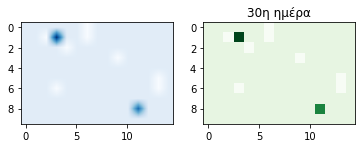

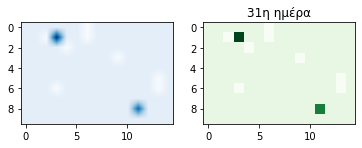

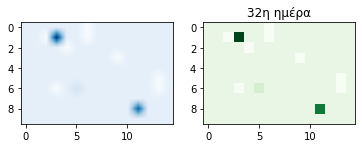

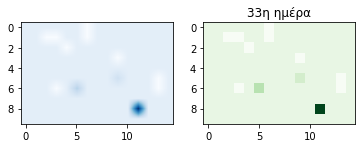

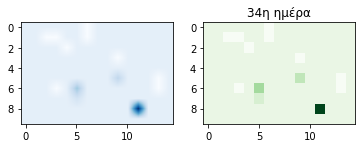

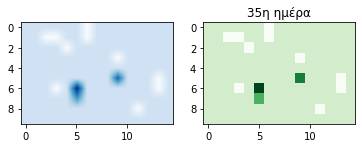

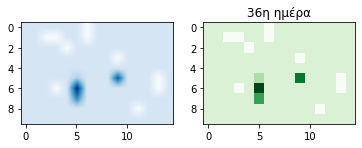

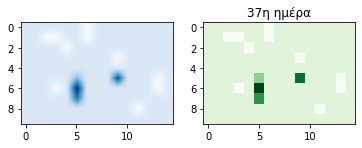

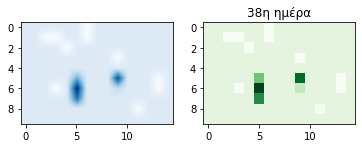

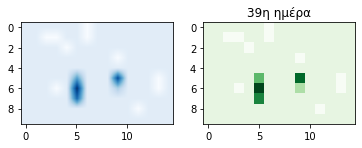

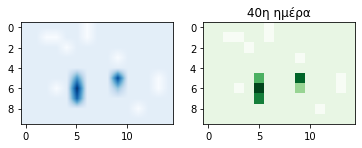

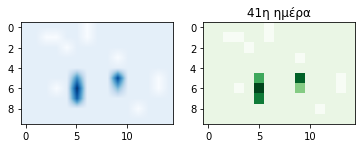

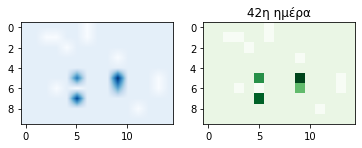

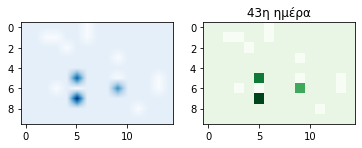

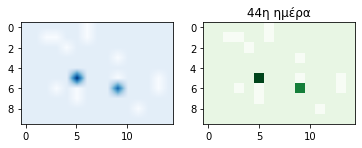

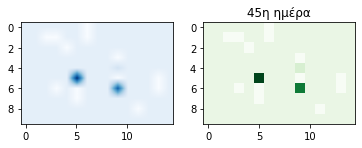

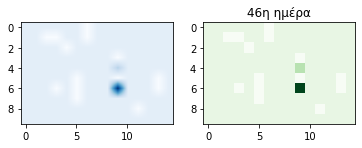

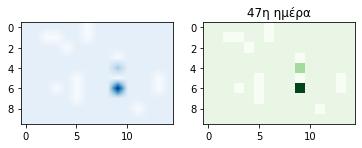

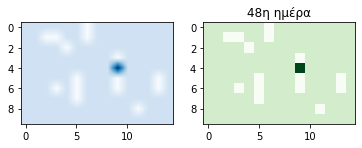

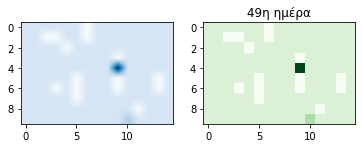

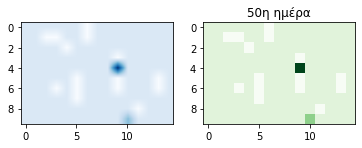

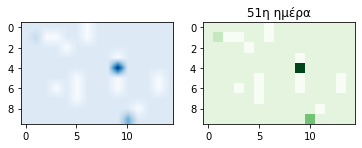

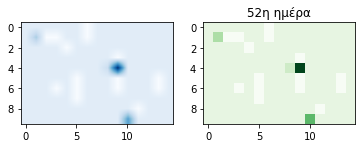

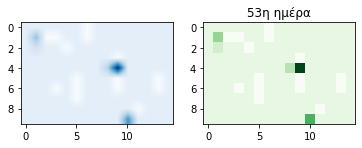

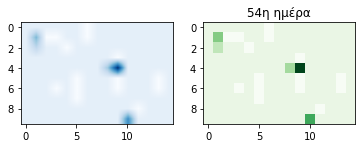

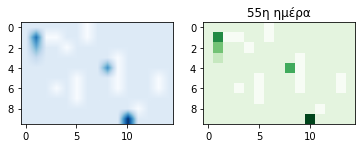

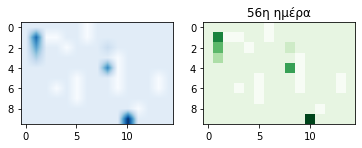

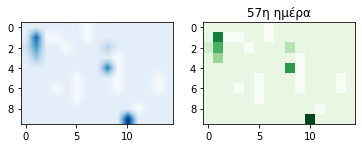

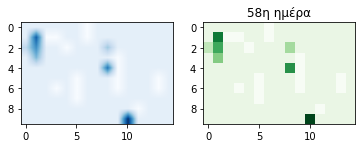

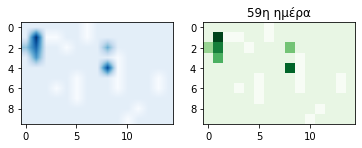

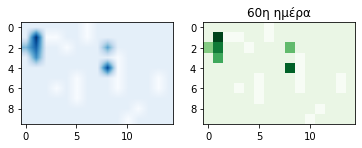

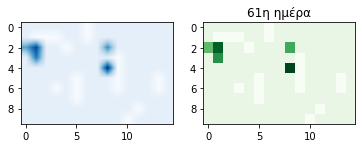

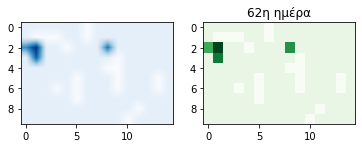

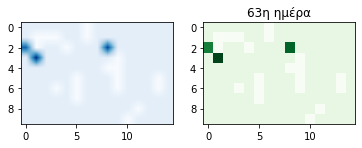

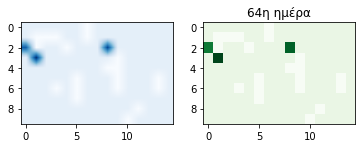

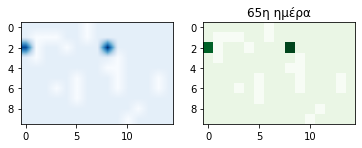

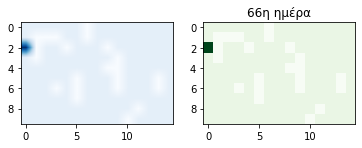

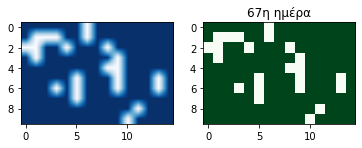

[1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 2, 3, 3, 5, 5, 5, 6, 6, 6, 6, 6, 5, 4, 2, 2, 3, 3, 4, 3, 4, 4, 5, 5, 5, 5, 4, 3, 2, 3, 2, 2, 1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7, 6, 6, 5, 4, 3, 3, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 5, 6, 8, 8, 8, 9, 9, 10, 10, 10, 10, 10, 10, 10, 11, 12, 13, 13, 14, 14, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 17, 17, 18, 19, 20, 20, 21, 22, 23]
[149, 149, 149, 149, 149, 149, 149, 148, 148, 147, 147, 147, 147, 147, 147, 146, 146, 146, 145, 144, 142, 142, 142, 141, 141, 140, 140, 140, 140, 140, 140, 140, 139, 138, 137, 137, 136, 136, 135, 135, 135, 135, 135, 135, 135, 134, 134, 134, 134, 133, 133, 132, 131, 130, 130, 129, 128, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127]
67


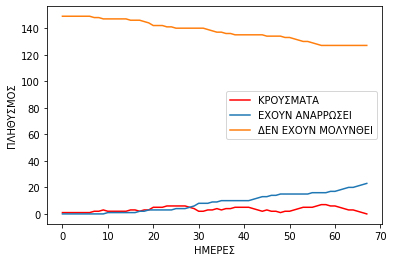

In [2]:
epidimia(10,15,10,0.01,0.01)